In [1]:
# Description : This program uses the Moving Average Convergence/Divergence (MACD) crossover
#                To determine when to buy and sell sell stock.

In [2]:
# Import Labraries
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
# Load the data from Yahoo using DataReader
df = web.DataReader('AAPL', data_source = 'yahoo', start='2015-01-01',end='2017-08-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522
...,...,...,...,...,...,...
2017-08-01,37.555000,37.102501,37.275002,37.512501,141474400.0,35.890636
2017-08-02,39.937500,39.040001,39.820000,39.285000,279747200.0,37.586502
2017-08-03,39.302502,38.755001,39.262501,38.892502,108389200.0,37.210976


In [30]:
# Get the number of rows and columns
df.shape

(654, 6)

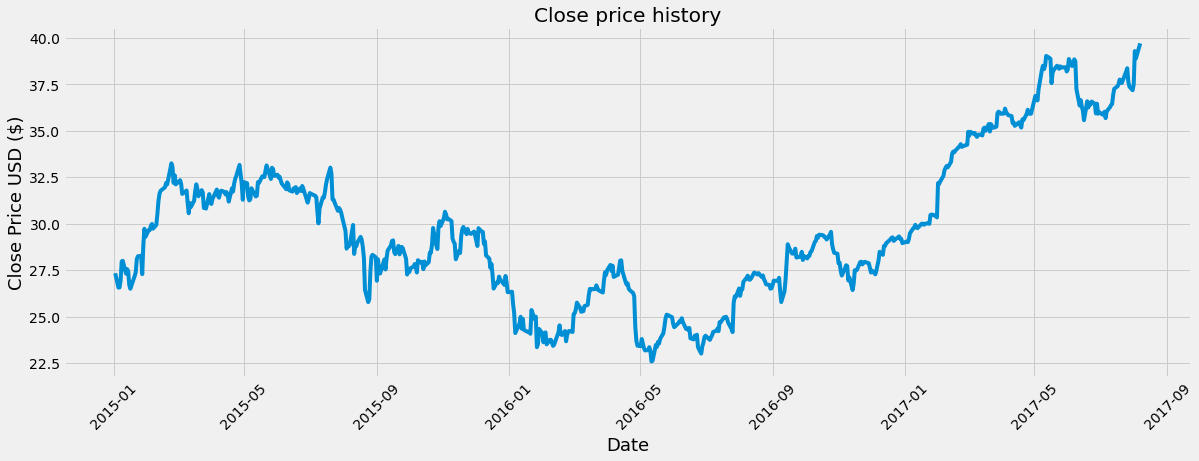

In [31]:
# Visualize the closing price history
plt.figure(figsize=(18,6))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [32]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

# Convert the dataframe to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

524

In [33]:
# Calculate the MACD and signal line indocators
# Calculate the short term exponential moving average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

# Calculate the long term exponential moving average
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

# Calculate the MACD Line 
MACD = ShortEMA - LongEMA

# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

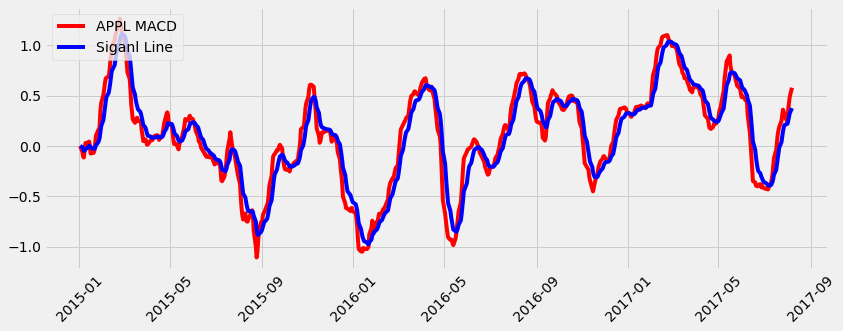

In [34]:
# plot the figure
plt.figure(figsize = (12.5, 4.5))
plt.plot(df.index, MACD, label='APPL MACD', color = 'red')
plt.plot(df.index, signal, label='Siganl Line', color='blue')
plt.xticks(rotation= 45)
plt.legend(loc='upper left')
plt.show()

In [35]:
# Create a new column for the data
df['MACD'] = MACD
df['Signal Line'] = signal
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502,0.000000,0.000000
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857,-0.061425,-0.012285
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146,-0.108650,-0.031558
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060,-0.114696,-0.048186
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522,-0.035562,-0.045661
...,...,...,...,...,...,...,...,...
2017-08-01,37.555000,37.102501,37.275002,37.512501,141474400.0,35.890636,0.236339,0.220313
2017-08-02,39.937500,39.040001,39.820000,39.285000,279747200.0,37.586502,0.362803,0.248811
2017-08-03,39.302502,38.755001,39.262501,38.892502,108389200.0,37.210976,0.426440,0.284337


In [44]:
# Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  
  return (Buy, Sell)

In [45]:
# Create buy and Sell Column
a = buy_sell(df)

df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502,0.000000,0.000000,NaN,NaN
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857,-0.061425,-0.012285,NaN,26.5625
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146,-0.108650,-0.031558,NaN,NaN
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060,-0.114696,-0.048186,NaN,NaN
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522,-0.035562,-0.045661,27.9725,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-01,37.555000,37.102501,37.275002,37.512501,141474400.0,35.890636,0.236339,0.220313,NaN,NaN
2017-08-02,39.937500,39.040001,39.820000,39.285000,279747200.0,37.586502,0.362803,0.248811,NaN,NaN
2017-08-03,39.302502,38.755001,39.262501,38.892502,108389200.0,37.210976,0.426440,0.284337,NaN,NaN


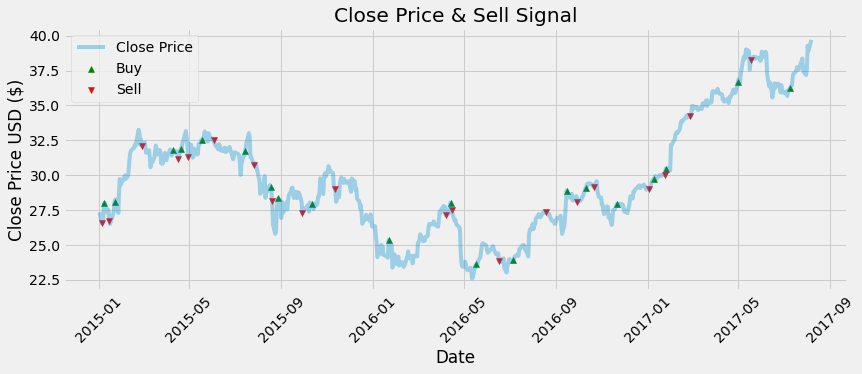

In [48]:
# Visually show the stock buy and sell signal
plt.figure(figsize=(12.5, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.xticks(rotation=45)
plt.title('Close Price & Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()